Model Objective: 

*Predict 2025 NPK trend and levels based on 2024 historical data using time series prediction model*

------------------------------------------------------------------------

#### Done so far: 
- Prediction of NPK level

1) Built ARIMA model using 2024 data
2) Apply to 2025 data
3) Plot Line Graph with different ranges for different category
4) Create table to show predicted NPK levels

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima

Load Data

In [270]:
# 2024
df2024 = pd.read_csv('C:/Users/leong/OneDrive/Documents/Ngee Ann Poly/Sem 3.1/DSCP/TinkerThings/2024/2024 Extracted.csv')

In [271]:
df2024.head()

,dbtimestamp,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH,NPK Ratio,N Category,P Category,K Category,NPK Level,NPK Done,feeding_description,Feeding Category
0,2025-05-30 00:01:55.980744,NDS016,213.0,18.9,6.0,59.0,52.0,25.6,5.5,1.0 : 9.8 : 8.7,Low,Low,Low,Invalid,Not Done Composting,NaN,NaN
1,2025-05-29 00:01:26.817793,NDS016,240.0,18.9,11.0,72.0,65.0,27.8,5.5,1.0 : 6.5 : 5.9,Low,Low,Low,Invalid,Not Done Composting,NaN,NaN
2,2025-05-28 00:00:48.939404,NDS016,247.0,18.1,13.0,76.0,68.0,26.5,5.5,1.0 : 5.8 : 5.2,Low,Low,Low,Invalid,Not Done Composting,NaN,NaN
3,2025-05-27 00:00:19.025437,NDS016,270.0,19.2,17.0,87.0,80.0,27.3,5.5,1.0 : 5.1 : 4.7,Low,Low,Low,Invalid,Not Done Composting,NaN,NaN
4,2025-05-26 00:01:19.007408,NDS016,292.0,20.7,22.0,98.0,90.0,26.9,5.2,1.0 : 4.5 : 4.1,Low,Low,Low,Invalid,Not Done Composting,NaN,NaN


In [272]:
# 2025
df2025 = pd.read_csv('2025 Extracted.csv')

In [273]:
df2025.head()

,date,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH,NPK Ratio,N Category,P Category,K Category,NPK Level,NPK Done
0,2025-05-28,NP002,1798.0,61.0,336.0,824.0,822.0,29.9,5.0,1.0 : 2.5 : 2.4,Optimal,Optimal,Optimal,Invalid,Optimal NPK
1,2025-05-27,NP002,1840.0,59.4,345.0,844.0,843.0,30.3,5.1,1.0 : 2.4 : 2.4,Optimal,Optimal,Optimal,Invalid,Optimal NPK
2,2025-05-26,NP002,1059.0,27.4,182.0,467.0,463.0,28.3,4.9,1.0 : 2.6 : 2.5,High,High,High,Invalid,Not Done Composting
3,2025-05-25,NP002,997.0,26.6,169.0,438.0,433.0,28.3,4.9,1.0 : 2.6 : 2.6,High,High,High,Invalid,Not Done Composting
4,2025-05-24,NP002,938.0,25.5,157.0,409.0,404.0,28.2,5.0,1.0 : 2.6 : 2.6,High,High,High,Invalid,Not Done Composting


Change time stamp to datetime

In [274]:
df2024['dbtimestamp'] = df2024['dbtimestamp'].astype('datetime64[ns]')

df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dbtimestamp          722 non-null    datetime64[ns]
 1   devicename           722 non-null    object        
 2   Soil EC              722 non-null    float64       
 3   Soil Moisture        722 non-null    float64       
 4   Soil Nitrogen        722 non-null    float64       
 5   Soil Phosphorus      722 non-null    float64       
 6   Soil Potassium       722 non-null    float64       
 7   Soil Temperature     722 non-null    float64       
 8   Soil pH              722 non-null    float64       
 9   NPK Ratio            722 non-null    object        
 10  N Category           722 non-null    object        
 11  P Category           722 non-null    object        
 12  K Category           722 non-null    object        
 13  NPK Level            722 non-null  

In [275]:
df2025['date'] = df2025['date'].astype('datetime64[ns]')

df2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15 non-null     datetime64[ns]
 1   devicename        15 non-null     object        
 2   Soil EC           15 non-null     float64       
 3   Soil Moisture     15 non-null     float64       
 4   Soil Nitrogen     15 non-null     float64       
 5   Soil Phosphorus   15 non-null     float64       
 6   Soil Potassium    15 non-null     float64       
 7   Soil Temperature  15 non-null     float64       
 8   Soil pH           15 non-null     float64       
 9   NPK Ratio         15 non-null     object        
 10  N Category        15 non-null     object        
 11  P Category        15 non-null     object        
 12  K Category        15 non-null     object        
 13  NPK Level         15 non-null     object        
 14  NPK Done          15 non-nul

Filter needed columns

2024

In [276]:
npk2024 = pd.concat([df2024.iloc[:, :9]], axis=1)

npk2024.head()

,dbtimestamp,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH
0,2025-05-30 00:01:55.980744,NDS016,213.0,18.9,6.0,59.0,52.0,25.6,5.5
1,2025-05-29 00:01:26.817793,NDS016,240.0,18.9,11.0,72.0,65.0,27.8,5.5
2,2025-05-28 00:00:48.939404,NDS016,247.0,18.1,13.0,76.0,68.0,26.5,5.5
3,2025-05-27 00:00:19.025437,NDS016,270.0,19.2,17.0,87.0,80.0,27.3,5.5
4,2025-05-26 00:01:19.007408,NDS016,292.0,20.7,22.0,98.0,90.0,26.9,5.2


In [277]:
npk2024 = npk2024.sort_values(['devicename', 'dbtimestamp'])
npk2024.head()

,dbtimestamp,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH
354,2025-01-15 03:02:26.401342,NDS002,1231.0,84.4,218.0,550.0,547.0,25.5,6.0
717,2024-11-05 11:16:19.373751,NDS004,436.0,45.1,52.0,167.0,160.0,28.5,7.1
709,2024-11-06 00:00:28.462437,NDS004,439.0,45.9,53.0,168.0,162.0,27.6,6.9
701,2024-11-07 00:00:26.447322,NDS004,432.0,47.0,51.0,165.0,158.0,27.5,7.1
698,2024-11-08 00:00:12.840733,NDS004,434.0,44.0,52.0,166.0,159.0,27.6,7.2


2025

In [278]:
npk2025 = pd.concat([df2025.iloc[:, :9]], axis=1)

npk2025.head()

,date,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH
0,2025-05-28,NP002,1798.0,61.0,336.0,824.0,822.0,29.9,5.0
1,2025-05-27,NP002,1840.0,59.4,345.0,844.0,843.0,30.3,5.1
2,2025-05-26,NP002,1059.0,27.4,182.0,467.0,463.0,28.3,4.9
3,2025-05-25,NP002,997.0,26.6,169.0,438.0,433.0,28.3,4.9
4,2025-05-24,NP002,938.0,25.5,157.0,409.0,404.0,28.2,5.0


Use time stamp as Index

In [279]:
npk2024 = npk2024.set_index('dbtimestamp')

In [280]:
npk2024 = npk2024.drop('devicename', axis=1)

In [281]:
# Aggregate by date — average of each nutrient across tanks per day
npk2024 = npk2024.groupby(npk2024.index).mean()

In [282]:
npk2024.head()

,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH
dbtimestamp,,,,,,,
2024-11-05 11:15:47.083616,577.0,23.5,81.0,235.0,229.0,28.7,7.2
2024-11-05 11:15:47.086161,1292.0,89.5,231.0,580.0,576.0,28.8,7.5
2024-11-05 11:15:49.053050,1940.0,89.6,366.0,892.0,892.0,28.0,6.8
2024-11-05 11:15:49.458716,613.0,35.3,89.0,252.0,246.0,28.3,7.7
2024-11-05 11:16:19.373751,436.0,45.1,52.0,167.0,160.0,28.5,7.1


In [283]:
npk2025 = npk2025.set_index('date')

In [284]:
npk2025.head()

,devicename,Soil EC,Soil Moisture,Soil Nitrogen,Soil Phosphorus,Soil Potassium,Soil Temperature,Soil pH
date,,,,,,,,
2025-05-28,NP002,1798.0,61.0,336.0,824.0,822.0,29.9,5.0
2025-05-27,NP002,1840.0,59.4,345.0,844.0,843.0,30.3,5.1
2025-05-26,NP002,1059.0,27.4,182.0,467.0,463.0,28.3,4.9
2025-05-25,NP002,997.0,26.6,169.0,438.0,433.0,28.3,4.9
2025-05-24,NP002,938.0,25.5,157.0,409.0,404.0,28.2,5.0


Create Prediction Model using SARIMAX

In [285]:
train = npk2024.copy()

In [286]:
nutrient_list = ['Soil Nitrogen', 'Soil Phosphorus', 'Soil Potassium']

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# your data structures:
# train:      DataFrame indexed by DateTime, columns = nutrients
# npk2025:    DataFrame with actual 2025 values, same columns
# nutrient_list = list(train.columns)
# future_index   = pd.date_range(start='2025-05-31', end='2025-06-30', freq='D')


In [288]:
# containers for all forecasts
all_forecasts = {}

for nutrient in nutrient_list:
    # fit model
    model = SARIMAX(train[nutrient], order=(1,0,1))
    fit   = model.fit(disp=False)

    # forecast into 2025
    fc        = fit.get_forecast(steps=len(future_index))
    mean_pred = fc.predicted_mean
    mean_pred.index = future_index

    ci        = fc.conf_int()
    ci.index = future_index

    # store for later use
    all_forecasts[nutrient] = {
        'mean': mean_pred,
        'lower': ci.iloc[:,0],
        'upper': ci.iloc[:,1]
    }


c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leong\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\l

Dataframe for Predicted Levels

In [289]:
# example for “Soil Nitrogen”
nut = 'Soil Nitrogen'
nitrogen = pd.DataFrame({
    'Forecast':   all_forecasts[nut]['mean'],
    'Lower CI':   all_forecasts[nut]['lower'],
    'Upper CI':   all_forecasts[nut]['upper']
}).round(1)

nitrogen.head()

,Forecast,Lower CI,Upper CI
date,,,
2025-05-28,36.6,-149.2,222.4
2025-05-27,36.6,-149.6,222.8
2025-05-26,36.6,-150.0,223.2
2025-05-25,36.6,-150.4,223.5
2025-05-24,36.5,-150.8,223.9


In [290]:
# example for “Soil Nitrogen”
nut = 'Soil Phosphorus'
phosphorus = pd.DataFrame({
    'Forecast':   all_forecasts[nut]['mean'],
    'Lower CI':   all_forecasts[nut]['lower'],
    'Upper CI':   all_forecasts[nut]['upper']
}).round(1)

phosphorus.head()

,Forecast,Lower CI,Upper CI
date,,,
2025-05-28,131.1,-298.4,560.6
2025-05-27,131.0,-299.4,561.4
2025-05-26,130.9,-300.4,562.2
2025-05-25,130.8,-301.4,563.0
2025-05-24,130.7,-302.4,563.9


In [291]:
# example for “Soil Nitrogen”
nut = 'Soil Potassium'
potassium = pd.DataFrame({
    'Forecast':   all_forecasts[nut]['mean'],
    'Lower CI':   all_forecasts[nut]['lower'],
    'Upper CI':   all_forecasts[nut]['upper']
}).round(1)

potassium.head()

,Forecast,Lower CI,Upper CI
date,,,
2025-05-28,124.1,-309.0,557.1
2025-05-27,124.0,-310.0,558.0
2025-05-26,123.9,-311.0,558.8
2025-05-25,123.8,-312.0,559.6
2025-05-24,123.7,-313.0,560.4


Line Graph for Predicted Levels

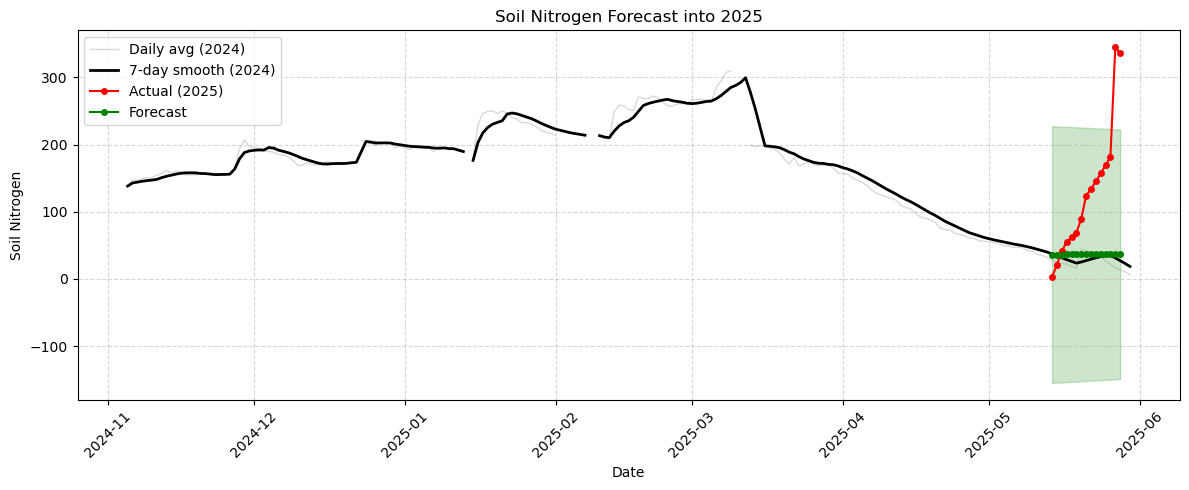

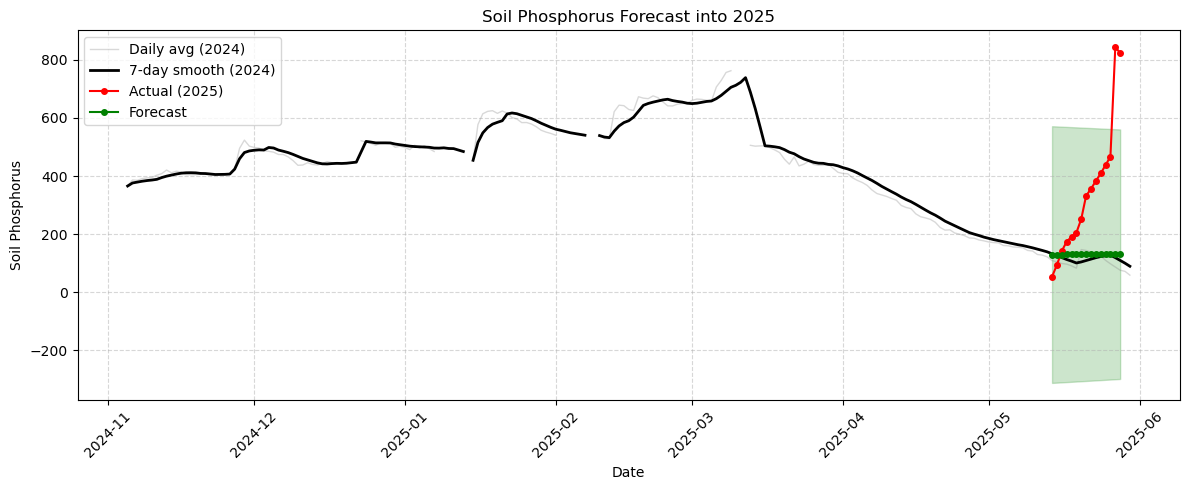

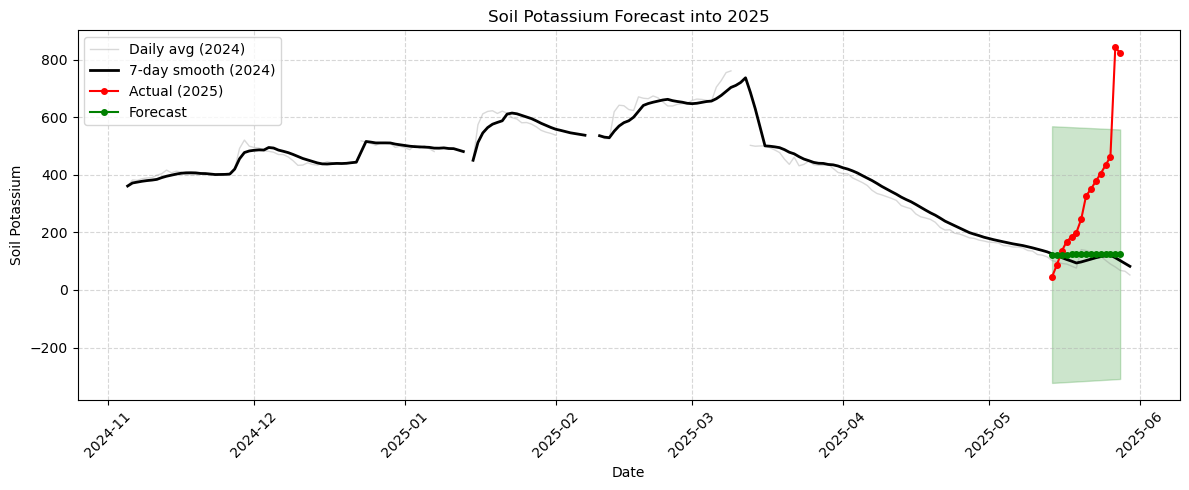

In [292]:
for nutrient in nutrient_list:
    # grab actual & forecast series
    actual = npk2025[nutrient]
    fc_m   = all_forecasts[nutrient]['mean']
    fc_l   = all_forecasts[nutrient]['lower']
    fc_u   = all_forecasts[nutrient]['upper']

    # 3.1) Resample & smooth 2024 data
    daily_avg = train[nutrient].resample('D').mean()
    smooth7   = daily_avg.rolling(window=7, min_periods=1).mean()

    # 3.2) Prep the forecast DataFrame for table
    tbl = pd.DataFrame({
        'Forecast': fc_m,
        'Lower CI': fc_l,
        'Upper CI': fc_u
    }).round(1)

    # 3.3) Plot
    plt.close('all')
    fig, ax = plt.subplots(figsize=(12,5))

    # raw daily (faint gray)
    ax.plot(daily_avg.index, daily_avg,
            color='gray', alpha=0.3, linewidth=1,
            label='Daily avg (2024)')

    # smoothed (bold black)
    ax.plot(smooth7.index, smooth7,
            color='black', linewidth=2,
            label='7-day smooth (2024)')

    # 2025 actual (red circles)
    ax.plot(future_index, actual,
            color='red', marker='o', markersize=4,
            label='Actual (2025)')

    # forecast (green circles + CI shading)
    ax.plot(future_index, fc_m,
            color='green', marker='o', markersize=4,
            label='Forecast')

    ax.fill_between(future_index, fc_l, fc_u,
                    color='green', alpha=0.2)

    # grid & labels
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(f'{nutrient} Forecast into 2025')
    ax.set_xlabel('Date')
    ax.set_ylabel(nutrient)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
